Here's an interesting question from John Bachman: what's the half-life of a gene symbol?

In [30]:
import datetime

import bio2bel_hgnc
from bio2bel_hgnc.manager import HGNC
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [2]:
m = bio2bel_hgnc.Manager()
m

<Manager connection=sqlite:////Users/cthoyt/.pyhgnc/data/pyhgnc.db>

In [3]:
# calculate 5 years ago
t = datetime.datetime.now() - datetime.timedelta(days=365 * 5)
t

datetime.datetime(2012, 12, 21, 17, 9, 40, 921757)

Number of genes never modified

In [4]:
m.session.query(HGNC).filter(HGNC.date_symbol_changed.is_(None)).count()

33385

Number of genes modified before 5 years ago

In [5]:
m.session.query(HGNC).filter(HGNC.date_symbol_changed < t).count()

6812

In [6]:
gene = m.session.query(HGNC).filter(HGNC.date_symbol_changed < t).first()

for k, v in gene.to_dict().items():
    if v is None:
        continue
    print('{}: {}'.format(k, v))

status: Approved
ucsc: uc002qse.3
date_approved_reserved: 2009-07-20
uuid: 7527e155-5add-48be-a110-89c4aa8cf9a3
ensembl_gene: ENSG00000268895
locus_group: non-coding RNA
vega: OTTHUMG00000183508
locus_type: RNA, long non-coding
locationsortable: 19q13.43
date_name_changed: 2012-08-15
name: A1BG antisense RNA 1
entrez: 503538
date_modified: 2013-06-27
location: 19q13.43
symbol: A1BG-AS1
date_symbol_changed: 2010-11-25
identifier: 37133


Number of genes modified in the last 5 years

In [7]:
m.session.query(HGNC).filter(HGNC.date_symbol_changed > t).count()

2245

In [8]:
gene = m.session.query(HGNC).filter(HGNC.date_symbol_changed > t).first()

for k, v in gene.to_dict().items():
    if v is None:
        continue
    print('{}: {}'.format(k, v))

status: Approved
ucsc: uc031plq.1
date_approved_reserved: 2005-05-06
uuid: 6a9d4792-e6b0-45da-8b59-61f0f60b7b19
ensembl_gene: ENSG00000184389
locus_group: protein-coding gene
vega: OTTHUMG00000004125
locus_type: gene with protein product
locationsortable: 01p35.1
date_name_changed: 2013-03-11
name: alpha 1,3-galactosyltransferase 2
entrez: 127550
date_modified: 2016-01-22
location: 1p35.1
symbol: A3GALT2
date_symbol_changed: 2013-03-11
identifier: 30005


Histogram over frequency per year

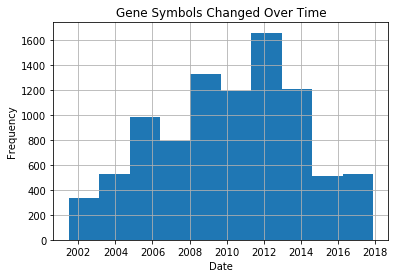

In [32]:
pd.Series([date for date, in m.session.query(HGNC.date_symbol_changed)]).hist()
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Gene Symbols Changed Over Time')
plt.show()